<a href="https://colab.research.google.com/github/hwankang/Defense/blob/main/XAI_%EC%8B%A4%EB%AC%B4%EC%98%88%EC%A0%9C_KNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%8F%85%EA%B0%90_%ED%99%98%EC%9E%90_%EB%B6%84%EB%A5%98_%EB%B0%8F_%EC%84%A4%EB%AA%85_(%EB%8F%99%EC%A4%80%EC%83%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XAI 실무예제: KNN을 이용한 독감 환자 분류 및 설명

* 지도식 학습 기법과 설명형 기법을 결합
* k-nearest neighbors with location history
* Copyright 2020 Denis Rothman MIT License. See LICENSE.
* Lecture: Junsang Dong (naebon1@gmail.com)
* https://www.packtpub.com/product/hands-on-explainable-ai-xai-with-python/9781800208131
* 2021.1.7 KIDET 
* 2021.9.7 KIDET 

## 라이브러리 및 데이터 가져오기

In [ ]:
#pandas
#matplotlib
#sklearn
#KNeighborsClassifier

import ### as pd
from ### import pyplot as plt
from ###.neighbors import ###
import os

In [ ]:
#os
#drive

import ##
from google.colab import ###

#Set repository to "github" to read the data from GitHub 
#Set repository to "google" to read the data from Google
repository="github"

if repository=="github":
  !curl -L https://raw.githubusercontent.com/PacktPublishing/Hands-On-Explainable-AI-XAI-with-Python/master/Chapter01/DLH.csv --output "DLH.csv"
  !curl -L https://raw.githubusercontent.com/PacktPublishing/Hands-On-Explainable-AI-XAI-with-Python/master/Chapter01/glh.jpg --output "glh.jpg"

  #Setting the path for each file
  df2="/content/DLH.csv"
  print(df2)

if repository=="google":
  #Mounting the drive. If it is not mounted, a prompt will provide instructions.
  drive.mount('/content/drive')
  #Setting the path for each file
  df2='/content/drive/My Drive/XAI/Chapter01/DLH.csv'
  print(df2)

## 데이터 확인

In [ ]:
#read_csv()
#df2

df = pd.###(###)
print (df)

In [ ]:
df

## 모델 훈련

In [ ]:
# KNN classification labels
#loc
X = df.###[:,'colored_sputum':'chicago']
Y = df.###[:,'class']

# Trains the model
#KNeighborsClassifier()
#fit()

knn = ###()
knn.###(#,#)

## 독감의 여러 증상을 1 ~ 9 단계로 분류

In [ ]:
#@title Alert evaluation form: do not change the values of france and chicago
colored_sputum =  1#@param {type:"integer"}
cough=3#@param {type:"integer"}
fever=7#@param {type:"integer"}
headache=7#@param {type:"integer"}
days=5#@param {type:"integer"}
# Insert the function here that analyzes the conjunction of
# the Location History of the patient and location of
# diseases per country/location 
france=0#@param {type:"integer"}
chicago=1#@param {type:"integer"}

## 증상에 따른 질병 예측

In [ ]:
# colored_sputum,cough,fever,headache
cs=colored_sputum;c=cough;f=fever;h=headache;d=days;fr=france;ch=chicago;
X_DL = [[cs,c,f,h,d,fr,ch]] 
#X_DL = [[1,3,7,3,5,0,1]] 

#predict()
prediction = knn.predict(X_DL)
predictv=str(prediction).strip('[]')
print ("The prediction is:",predictv)


## "bad_flu"인 경우 경고 메시지 발송

In [ ]:
alert=predictv # instead of the constant "bad_flu", a variable can used after going through a list of serious diseases
print(alert)
if alert=='bad_flu':
  print("Further urgent information might be required. Activate the XAI interface.")

## XAI STEP 1: 모델 결과값 및 설명문 출력

In [ ]:
df = pd.read_csv(df2) 
# Plotting the relation of each feature with each class
figure,(sub1,sub2,sub3,sub4,sub5)=plt.subplots(5,sharex=True,sharey=True)
plt.suptitle('k-nearest neighbors')
plt.xlabel('Feature')
plt.ylabel('Class') 

#scatter()
#legend()

X = df.loc[:,'colored_sputum']
Y = df.loc[:,'class']
sub1.scatter(X, Y,color='blue',label='colored_sputum')
sub1.legend(loc=4, prop={'size': 5})
sub1.set_title('Medical Diagnosis Software')

X = df.loc[:,'cough']
Y = df.loc[:,'class']
sub2.scatter(X, Y,color='green',label='cough')
sub2.legend(loc=4, prop={'size': 5})

X = df.loc[:,'fever']
Y = df.loc[:,'class']
sub3.scatter(X, Y,color='red',label='fever')
sub3.legend(loc=4, prop={'size': 5})

X = df.loc[:,'headache']
Y = df.loc[:,'class']
sub4.scatter(X, Y,color='black',label='headache')
sub4.legend(loc=4, prop={'size': 5})

X = df.loc[:,'days']
Y = df.loc[:,'class']
sub5.scatter(X, Y,color='brown',label='days')
sub5.legend(loc=4, prop={'size': 5})

#show()

figure.subplots_adjust(hspace=0)
plt.show()

Explanations for alert level

In [ ]:
#This is an example program. DO NOT USE this for a real-life diagnosis. 
#cs=colored_sputum;c=cough;f=fever;
#h=headache;d=days;fr=france;ch=chicago;
if(f>5):
  print("your patient has a high fever")
if(d>4):
  print("your patient has had a high fever for more than 4 days even with medication")
if(fr<1):
  print("it is probable that your patient was not in contact with a virus in France")
if(chicago>0):
  print("it is probable that your patient was in contact with a virus in Chicago")


## 지역별 감염 횟수 정보 제공

In [ ]:
print("Your patient is part of the XAI program that you have signed up for.")
print("As such, we have your patient's authorization to access his Google Location History which we update in our database once a day between 10 pm and 6 am.")
print("The following map shows that your patient was in Chicago, Paris, and Lyon within the past 3 weeks")
print("For this diagnosis, we only activated a search for the past 3 weeks")
print("Please ask your patient if he was in Chicago in the past 3 weeks. If the answer is yes, continue the AI explanation.")

![](/content/glh.jpg)


In [ ]:
#imread()
#imshow()

import matplotlib.image as mpimg
img=mpimg.imread('/content/glh.jpg')
imgplot = plt.imshow(img)
plt.show()

## 시카고 CULEX PIPIENS/RESTUANS의 검진 데이터 사용

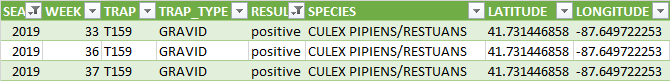

In [ ]:
print("Your patient was in Chicago in the period during which there were positive detections of the CULEX PIPIENS/RESTUANS mosquito.")
print("The mosquitos were trapped with a Gravid trap.")
print("The CULEX PIPIENS/RESTUANS mosquito is a vector for the West Nile virus.")
print("We matched your patient's location history with the presence of the CULEX PIPIENS/RESTUANS in Chicago.")
print("We then matched the CULEX PIPIENS/RESTUANS with West Nile virus.")
print("Continue to see information the West Nile virus.")

## 응용 예제를 위해 웨스트 나일 바이러스 정보 찾기 
* If need information on the West Nile virus, click on the following link:
[West Nile virus](https://www.healthline.com/health/west-nile-virus#treatment)

if you are interested in similar situations:
[cases in Greece](
https://www.forbes.com/sites/alexledsom/2019/06/17/mosquitoes-threaten-greek-tourist-industry-with-west-nile-virus/#1123f99648a8)
